## Задание 1

In [167]:
import numpy as np
import re
from scipy.spatial import distance
from matplotlib import pyplot as plt

In [69]:
with open('sentences.txt','r') as f:
    texts = f.readlines()

In [70]:
texts = [text[:-1].lower() for text in texts]
texts

['in comparison to dogs, cats have not undergone major changes during the domestication process.',
 'as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.',
 'a common interactive use of cat for a single file is to output the content of a file to standard output.',
 'cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.',
 'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.',
 'the domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.',
 'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).',
 'however, if the output is piped or redirected, cat is unnecessary.',
 'cat with one named file is safer where human error i

In [71]:
tokens = []
for text in texts:
    sent = re.split('[^a-z]', text)
    sent = [word for word in sent if word!='']
    tokens.append(sent)
tokens

[['in',
  'comparison',
  'to',
  'dogs',
  'cats',
  'have',
  'not',
  'undergone',
  'major',
  'changes',
  'during',
  'the',
  'domestication',
  'process'],
 ['as',
  'cat',
  'simply',
  'catenates',
  'streams',
  'of',
  'bytes',
  'it',
  'can',
  'be',
  'also',
  'used',
  'to',
  'concatenate',
  'binary',
  'files',
  'where',
  'it',
  'will',
  'just',
  'concatenate',
  'sequence',
  'of',
  'bytes'],
 ['a',
  'common',
  'interactive',
  'use',
  'of',
  'cat',
  'for',
  'a',
  'single',
  'file',
  'is',
  'to',
  'output',
  'the',
  'content',
  'of',
  'a',
  'file',
  'to',
  'standard',
  'output'],
 ['cats',
  'can',
  'hear',
  'sounds',
  'too',
  'faint',
  'or',
  'too',
  'high',
  'in',
  'frequency',
  'for',
  'human',
  'ears',
  'such',
  'as',
  'those',
  'made',
  'by',
  'mice',
  'and',
  'other',
  'small',
  'animals'],
 ['in',
  'one',
  'people',
  'deliberately',
  'tamed',
  'cats',
  'in',
  'a',
  'process',
  'of',
  'artificial',
  's

In [96]:
vokab = {}
n_words = -1
for sent in tokens:
    for word in sent:
        if word not in vokab:
            n_words += 1
            vokab[word] = n_words
print(n_words,vokab)

253 {'in': 0, 'comparison': 1, 'to': 2, 'dogs': 3, 'cats': 4, 'have': 5, 'not': 6, 'undergone': 7, 'major': 8, 'changes': 9, 'during': 10, 'the': 11, 'domestication': 12, 'process': 13, 'as': 14, 'cat': 15, 'simply': 16, 'catenates': 17, 'streams': 18, 'of': 19, 'bytes': 20, 'it': 21, 'can': 22, 'be': 23, 'also': 24, 'used': 25, 'concatenate': 26, 'binary': 27, 'files': 28, 'where': 29, 'will': 30, 'just': 31, 'sequence': 32, 'a': 33, 'common': 34, 'interactive': 35, 'use': 36, 'for': 37, 'single': 38, 'file': 39, 'is': 40, 'output': 41, 'content': 42, 'standard': 43, 'hear': 44, 'sounds': 45, 'too': 46, 'faint': 47, 'or': 48, 'high': 49, 'frequency': 50, 'human': 51, 'ears': 52, 'such': 53, 'those': 54, 'made': 55, 'by': 56, 'mice': 57, 'and': 58, 'other': 59, 'small': 60, 'animals': 61, 'one': 62, 'people': 63, 'deliberately': 64, 'tamed': 65, 'artificial': 66, 'selection': 67, 'they': 68, 'were': 69, 'useful': 70, 'predators': 71, 'vermin': 72, 'domesticated': 73, 'its': 74, 'closes

In [83]:
texts = [
    [
        vokab[word] for word in sent
    ]
    for sent in tokens
]

In [101]:
m = np.zeros((len(texts), n_words+1))

In [117]:
for i in range(len(m)):
    for j in range(len(m[0])):
        m[i][j] = texts[i].count(j)

In [145]:
dists = []
for i, v in enumerate(m):
    dist = (i, distance.cosine(m[0],v))
    print(dist)
    dists.append(dist)

(0, 0.0)
(1, 0.9527544408738466)
(2, 0.8644738145642124)
(3, 0.8951715163278082)
(4, 0.7770887149698589)
(5, 0.9402385695332803)
(6, 0.7327387580875756)
(7, 0.9258750683338899)
(8, 0.8842724875284311)
(9, 0.9055088817476932)
(10, 0.8328165362273942)
(11, 0.8804771390665607)
(12, 0.8396432548525454)
(13, 0.8703592552895671)
(14, 0.8740118423302576)
(15, 0.9442721787424647)
(16, 0.8406361854220809)
(17, 0.956644501523794)
(18, 0.9442721787424647)
(19, 0.8885443574849294)
(20, 0.8427572744917122)
(21, 0.8250364469440588)


In [149]:
sorted(dists, key = lambda d:d[1])[1:3]

[(6, 0.7327387580875756), (4, 0.7770887149698589)]

## Задание 2

In [154]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

### многочлен 1 степени
сделал некрасиво

In [220]:
X = np.array([[1,1],[1,15]])
Y = f(X[:,1])

In [221]:
W = scipy.linalg.solve(X,Y)
W

array([ 3.43914511, -0.18692825])

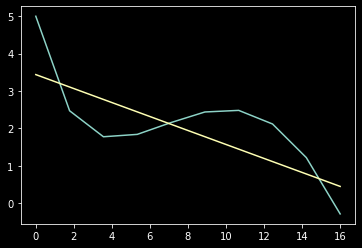

In [216]:
xs = np.linspace(0,16,10).reshape((10,1))
plt.plot(xs,f(xs))
plt.plot(xs,(W * np.append(np.ones(xs.shape),xs,axis=1)).sum(axis=1))

In [215]:
(W * np.append(np.ones(xs.shape),xs,axis=1)).sum(axis=1)

array([3.43914511, 3.10682823, 2.77451135, 2.44219447, 2.10987758,
       1.7775607 , 1.44524382, 1.11292694, 0.78061006, 0.44829317])

### многочлен второй стпеени

In [248]:
points = np.array([1,8,15])
X = np.c_[points**0,points,points**2]
Y = f(X[:,1])

w = scipy.linalg.solve(X,Y)
w

array([ 3.32512949, -0.06531159, -0.00760104])

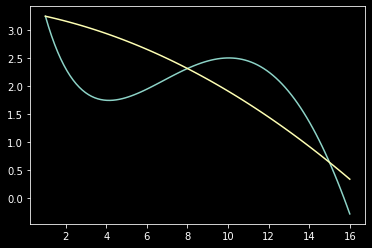

In [249]:
x = np.linspace(1,16,100).reshape(100,1)
x = np.c_[x**0, x**1,x**2]

plt.plot(x[:,1],f(x[:,1]))
plt.plot(x[:,1], x@w)
plt.show()

### многочлен третьей степени

In [250]:
points = np.array([1,4,10,15])
X = np.c_[points**0,points,points**2,points**3]
Y = f(X[:,1])

w = scipy.linalg.solve(X,Y)
w

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

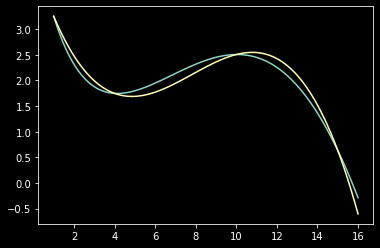

In [251]:
x = np.linspace(1,16,100).reshape(100,1)
x = np.c_[x**0, x**1,x**2,x**3]

plt.plot(x[:,1],f(x[:,1]))
plt.plot(x[:,1], x@w)
plt.show()

In [254]:
with np.printoptions(precision=2, suppress=True):
    print(w)

[ 4.36 -1.3   0.19 -0.01]
